In [24]:
from scipy.io import loadmat
#loading in dataset
path = './data/mnist-original.mat'
mnist = loadmat(path)
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [35]:
from numpy import swapaxes
#reshaping
X,y = mnist['data'],mnist['label'][0]
X = swapaxes(X,1,0)
print (X.shape, y.shape)

(70000, 784) (70000,)


In [61]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def printImage(x):
    '''
    prints the image of a given digit
    '''
    some_digit = x.reshape(28,28)
    plt.imshow(some_digit, cmap = matplotlib.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()

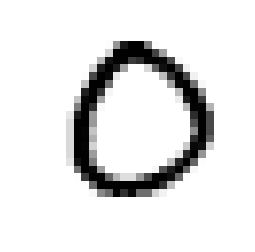

0.0


In [62]:
#verifying data set is correct
printImage(X[3601])
print(y[3601])

In [45]:
#splitting into train and test data sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
import numpy as np
shuffle_perm = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_perm], y_train[shuffle_perm]

In [47]:
#4-not-4 classifier
y_train_4 = (y_train == 4) #true for all 4, flase for all other digits
y_test_4 = (y_test == 4)

from sklearn.linear_model import SGDClassifier as sgdc
sgdc_4 = sgdc(random_state=42)
sgdc_4.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

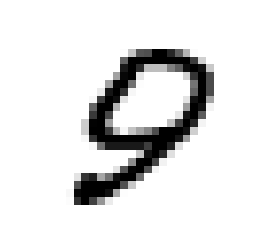

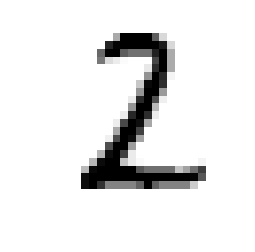

array([False, False])

In [90]:
#a random first numer
rand_val = np.random.randint(low=0,high=60000)
val_1 = X_train[rand_val]
printImage(val_1)

#a random second numer
rand_val = np.random.randint(low=0,high=60000)
val_2 = X_train[rand_val]
printImage(val_2)

sgdc_4.predict([val_1, val_2])